In [58]:
# Q-1.
#Consider you are given a dataset which consists of details of titanic ship travelers and who survived and who did not on 
#that epic journey. The problem is, given a person who is a traveler on that titanic journey as input, predict if he survived.
#Create models using all the decision tree techniques such as CART, C4.5 and ID3 and find the best of all your models. 
#Use python to create the models and cross-validate the dataset. Please make sure you also use appropriate performance measures,
#error values, bias and variance to come to conclusion of the best dataset

#Dataset:         titanic dataset from Kaggle (create a login to get the dataset)
#Model:           Classification using decision trees
#Algorithm:       ID3, C4.5 and CART
#Language:        python


import pandas as pd
import numpy as np

%pylab inline

from sklearn.cross_validation import train_test_split # cross-validate the dataset
from sklearn.model_selection import cross_val_score
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Read the data form Titanic Dataset

In [59]:

df = pd.read_csv('D:/AIML-L2/Titanic_Q1.csv')

# Check the dataset with df.head(3) it will show 3 records

In [60]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Check the how many rows and columns

In [61]:
df.shape

(891, 12)

# Describe the dataset

In [62]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.712885,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.529273,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.250000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check the how many male and female

In [63]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

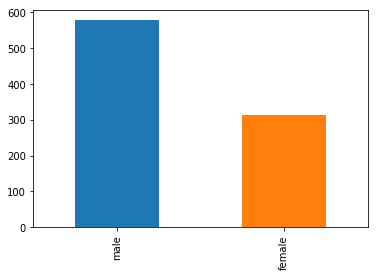

In [64]:
df.Sex.value_counts().plot(kind='bar')

# Change the data from Char to integer for Sex column

In [65]:
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1

# Check if there is null values and if required fill that column with values

In [66]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
# See the columns is dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Define the features and traget variables

In [68]:
X = np.array(df.drop(['Survived', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1))

y = np.array(df['Survived'])

In [69]:
X.shape

(891, 2)

In [70]:
y.shape

(891,)

In [71]:
# Check the sex columns values changed as male=0 and female=1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


# Split the dataset into test and train set

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the model using decision tree

In [73]:
from sklearn import tree

In [74]:
#
clf = tree.DecisionTreeClassifier()

In [75]:
scoring = 'accuracy'

# Train the your model using fit method

In [76]:
#
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
X_train.shape

(712, 2)

In [78]:
y_train.shape

(712,)

In [87]:
#score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)

In [88]:
score = cross_val_score(clf, X_train, y_train )

In [92]:
# Train dataset score

print(score)

[0.63333333 0.65       0.6440678 ]


In [93]:
# # Test dataset score

score = cross_val_score(clf,X_test, y_test )

In [95]:
print(score)

[0.63333333 0.63333333 0.6440678 ]


In [96]:
#
#clf.fit(X_train, y_train)

In [97]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
score = cross_val_score(clf, X_train, y_train )

In [99]:
#score = cross_val_score(clf,X_test, y_test )

In [100]:
#print(score)

In [101]:
#X_train.shape

In [102]:
#y_train.shape

In [103]:
# Importing Classifier Modules
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier

#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#import numpy as np

#clf = KNeighborsClassifier(n_neighbors = 13)
#scoring = 'accuracy'
#score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
#print(score)